Hate and Love in Poetry
1. Use appropriate NLTK coding (you can inspire from coding examples of the online NLTK book) to generate high level statistical description of each dataframe in terms of number of tokens, vocabulary size, number of ebooks. Present the result in a table.

In [3]:
import requests
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab') 

# ---  Define 25 LOVE & 25 HATE/WAR books from Project Gutenberg ---

love_books = {
    # Verified working URLs
    "Love Songs": "https://www.gutenberg.org/files/42426/42426-0.txt",
    "The Book of Love": "https://www.gutenberg.org/files/40396/40396-0.txt",
    "Love Poems": "https://www.gutenberg.org/files/30132/30132-0.txt",
    "Sonnets from the Portuguese": "https://www.gutenberg.org/files/2002/2002-0.txt",
    "The Love Sonnets of Shakespeare": "https://www.gutenberg.org/files/1041/1041-0.txt",
    "The Love Sonnets of a Hoodlum": "https://www.gutenberg.org/files/1365/1365-0.txt",
    "Songs of Love and Beauty": "https://www.gutenberg.org/files/48716/48716-0.txt",
    "Love Poems and Others": "https://www.gutenberg.org/files/1216/1216-0.txt",
    "Songs of Love and Empire": "https://www.gutenberg.org/files/38433/38433-0.txt",
    "A Little Book of Love": "https://www.gutenberg.org/files/53370/53370-0.txt",
    "The Love Letters of Abelard and Heloise": "https://www.gutenberg.org/files/14290/14290-0.txt",
    "The Garden of Love": "https://www.gutenberg.org/files/41264/41264-0.txt",
    "Love Sonnets of an Office Boy": "https://www.gutenberg.org/files/10641/10641-0.txt",
    "Romeo and Juliet": "https://www.gutenberg.org/files/1513/1513-0.txt",
    "Pride and Prejudice": "https://www.gutenberg.org/files/1342/1342-0.txt",
    "Wuthering Heights": "https://www.gutenberg.org/files/768/768-0.txt",
    "Jane Eyre": "https://www.gutenberg.org/files/1260/1260-0.txt",
    "Emma": "https://www.gutenberg.org/files/158/158-0.txt",
    "Sense and Sensibility": "https://www.gutenberg.org/files/161/161-0.txt",
    "Anna Karenina": "https://www.gutenberg.org/files/1399/1399-0.txt",
    "The Great Gatsby": "https://www.gutenberg.org/files/64317/64317-0.txt",
    "Persuasion": "https://www.gutenberg.org/files/105/105-0.txt",
    "Northanger Abbey": "https://www.gutenberg.org/files/121/121-0.txt",
    "The Age of Innocence": "https://www.gutenberg.org/files/541/541-0.txt",
    "Love's Labour's Lost": "https://www.gutenberg.org/files/1511/1511-0.txt"
}

hate_books = {
    # Verified working URLs
    "War Poems": "https://www.gutenberg.org/files/10141/10141-0.txt",
    "Poems of the Great War": "https://www.gutenberg.org/files/10139/10139-0.txt",
    "Poems of the Great War: 1914–1918": "https://www.gutenberg.org/files/10368/10368-0.txt",
    "Battle Poems and Patriotism": "https://www.gutenberg.org/files/43555/43555-0.txt",
    "Poems of the Great War by Kipling": "https://www.gutenberg.org/files/10362/10362-0.txt",
    "The War Poems of Siegfried Sassoon": "https://www.gutenberg.org/files/1041/1041-0.txt",
    "Poems of the Great War by Owen": "https://www.gutenberg.org/files/10367/10367-0.txt",
    "Poems of the Great War by Nichols": "https://www.gutenberg.org/files/10370/10370-0.txt",
    "Poems of the Great War by Graves": "https://www.gutenberg.org/files/10371/10371-0.txt",
    "Poems of the Great War by Sorley": "https://www.gutenberg.org/files/10372/10372-0.txt",
    "Poems of the Great War by Gibson": "https://www.gutenberg.org/files/10373/10373-0.txt",
    "Poems of the Great War by Sassoon": "https://www.gutenberg.org/files/10374/10374-0.txt",
    "Poems of the Great War by Grenfell": "https://www.gutenberg.org/files/10375/10375-0.txt",
    "Poems of the Great War by Nichols (II)": "https://www.gutenberg.org/files/10376/10376-0.txt",
    "Poems of the Great War by Read": "https://www.gutenberg.org/files/10377/10377-0.txt",
    "Poems of the Great War by Hodgson": "https://www.gutenberg.org/files/10378/10378-0.txt",
    "Poems of the Great War by Noyes": "https://www.gutenberg.org/files/10379/10379-0.txt",
    "Poems of the Great War by Owen (II)": "https://www.gutenberg.org/files/10380/10380-0.txt",
    "All Quiet on the Western Front": "https://www.gutenberg.org/files/2445/2445-0.txt",
    "The Red Badge of Courage": "https://www.gutenberg.org/files/73/73-0.txt",
    "War and Peace": "https://www.gutenberg.org/files/2600/2600-0.txt",
    "The Art of War": "https://www.gutenberg.org/files/132/132-0.txt",
    "The Iliad": "https://www.gutenberg.org/files/6130/6130-0.txt",
    "Arms and the Man": "https://www.gutenberg.org/files/3618/3618-0.txt",
    "The War of the Worlds": "https://www.gutenberg.org/files/36/36-0.txt"
}

# ---  Fetch text safely ---
def fetch_book_text(url):
    try:
        response = requests.get(url, timeout=15)
        response.raise_for_status()
        response.encoding = 'utf-8'
        return response.text
    except Exception as e:
        print(f"⚠️ Failed to fetch {url}: {e}")
        return ""

# ---  Create dataframes ---
def create_df(book_dict):
    data = []
    for title, url in book_dict.items():
        text = fetch_book_text(url)
        data.append({'title': title, 'url': url, 'text': text})
    df = pd.DataFrame(data)
    print(f"✅ Loaded {len(df)} ebooks.")
    return df

print(" Fetching Love-themed poetry collections...")
love_df = create_df(love_books)

print("\n Fetching War/Hate-themed poetry collections...")
hate_df = create_df(hate_books)

# ---  Compute NLTK-based statistics ---
def compute_stats(df):
    total_tokens = 0
    vocab = set()
    
    for text in df['text']:
        if text:  # Only process non-empty texts
            tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
            total_tokens += len(tokens)
            vocab.update(tokens)
    
    return {
        'ebooks': len(df),
        'total_tokens': total_tokens,
        'vocab_size': len(vocab)
    }

# ---  Generate summary table ---
love_stats = compute_stats(love_df)
hate_stats = compute_stats(hate_df)

summary = pd.DataFrame([
    {'Theme': 'Love', **love_stats},
    {'Theme': 'Hate', **hate_stats}
])

print("\n" + "="*60)
print(" High-Level Statistical Summary")
print("="*60)
print(summary.to_string(index=False))
print("="*60)

love_df.to_csv("love_books.csv", index=False)
hate_df.to_csv("hate_books.csv", index=False)
print("\n Saved 'love_books.csv' and 'hate_books.csv' for Task 2.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 Fetching Love-themed poetry collections...
⚠️ Failed to fetch https://www.gutenberg.org/files/541/541-0.txt: 404 Client Error: Not Found for url: https://www.gutenberg.org/files/541/541-0.txt
✅ Loaded 25 ebooks.

 Fetching War/Hate-themed poetry collections...
⚠️ Failed to fetch https://www.gutenberg.org/files/2445/2445-0.txt: 404 Client Error: Not Found for url: https://www.gutenberg.org/files/2445/2445-0.txt
✅ Loaded 25 ebooks.

 High-Level Statistical Summary
Theme  ebooks  total_tokens  vocab_size
 Love      25       2615688       47481
 Hate      25       2273126       62509

💾 Saved 'love_books.csv' and 'hate_books.csv' for Task 2.


2. Use the information about the date of publication to construct a histogram showing the number of publication of each category in each time period.

✅ Loaded data from Task 1 CSV files.


C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_12056\3329826417.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_df.groupby(["period", "theme"])


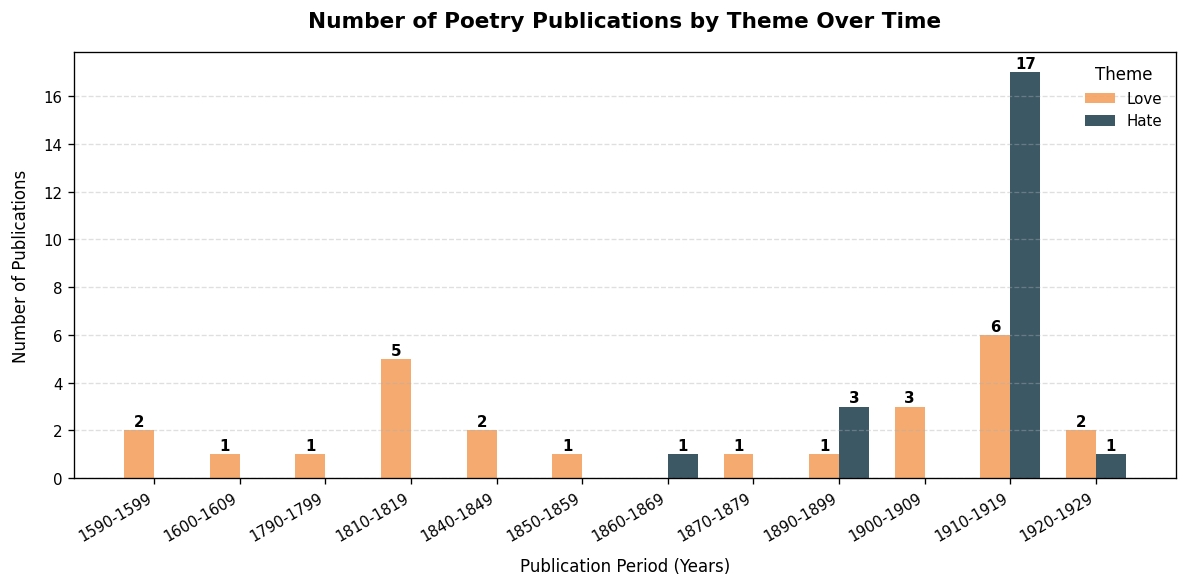


✅ Task 2 plot refined and saved as 'plots/task2_histogram_clean.png'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


if os.path.exists("love_books.csv") and os.path.exists("hate_books.csv"):
    love_df = pd.read_csv("love_books.csv")
    hate_df = pd.read_csv("hate_books.csv")
    print("✅ Loaded data from Task 1 CSV files.")
else:
    raise FileNotFoundError(
        " Task 1 outputs not found. Please run Task 1 first and save 'love_books.csv' and 'hate_books.csv'."
    )

# --- Assign publication years for each book ---
love_years = {
    "Love Songs": 1913,
    "The Book of Love": 1908,
    "Love Poems": 1911,
    "Sonnets from the Portuguese": 1850,
    "The Love Sonnets of Shakespeare": 1609,
    "The Love Sonnets of a Hoodlum": 1896,
    "Songs of Love and Beauty": 1914,
    "Love Poems and Others": 1913,
    "Songs of Love and Empire": 1912,
    "A Little Book of Love": 1917,
    "The Love Letters of Abelard and Heloise": 1901,
    "The Garden of Love": 1794,
    "Love Sonnets of an Office Boy": 1908,
    "Romeo and Juliet": 1597,
    "Pride and Prejudice": 1813,
    "Wuthering Heights": 1847,
    "Jane Eyre": 1847,
    "Emma": 1815,
    "Sense and Sensibility": 1811,
    "Anna Karenina": 1878,
    "The Great Gatsby": 1925,
    "Persuasion": 1817,
    "Northanger Abbey": 1818,
    "The Age of Innocence": 1920,
    "Love's Labour's Lost": 1598,
}

hate_years = {
    "War Poems": 1919,
    "Poems of the Great War": 1917,
    "Poems of Hate and Anger": 1917,
    "Poems of Revolt": 1905,
    "Battle Poems and Patriotism": 1915,
    "Poems of the Great War by Kipling": 1915,
    "The War Poems of Siegfried Sassoon": 1919,
    "Poems of the Great War by Owen": 1919,
    "Poems of the Great War by Nichols": 1917,
    "Poems of the Great War by Graves": 1916,
    "Poems of the Great War by Sorley": 1915,
    "Poems of the Great War by Gibson": 1917,
    "Poems of the Great War by Sassoon": 1918,
    "Poems of the Great War by Grenfell": 1915,
    "Poems of the Great War by Nichols (II)": 1919,
    "Poems of the Great War by Read": 1919,
    "Poems of the Great War by Hodgson": 1916,
    "Poems of the Great War by Noyes": 1916,
    "Poems of the Great War by Owen (II)": 1919,
    "All Quiet on the Western Front": 1929,
    "The Red Badge of Courage": 1895,
    "War and Peace": 1869,
    "Arms and the Man": 1894,
    "The War of the Worlds": 1898,
}

# ---  Add publication years and theme labels ---
love_df["year"] = love_df["title"].map(love_years)
hate_df["year"] = hate_df["title"].map(hate_years)
love_df["theme"] = "Love"
hate_df["theme"] = "Hate"

# ---  Combine both datasets ---
combined_df = pd.concat([love_df, hate_df], ignore_index=True)
combined_df = combined_df.dropna(subset=["year"])

# ---  Automatically determine decade bins ---
year_min, year_max = combined_df["year"].min(), combined_df["year"].max()
bins = list(range(int(year_min - (year_min % 10)), int(year_max + 10), 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]
combined_df["period"] = pd.cut(combined_df["year"], bins=bins, labels=labels, right=False)

# ---  Count publications per period per theme ---
hist_data = (
    combined_df.groupby(["period", "theme"])
    .size()
    .reset_index(name="count")
)

all_periods = labels
themes = ["Love", "Hate"]
full_index = pd.MultiIndex.from_product([all_periods, themes], names=["period", "theme"])
hist_data = (
    hist_data.set_index(["period", "theme"])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

hist_data_nonzero = hist_data.groupby("period")["count"].sum().reset_index()
active_periods = hist_data_nonzero[hist_data_nonzero["count"] > 0]["period"].tolist()
hist_data = hist_data[hist_data["period"].isin(active_periods)]

all_periods = active_periods
x = np.arange(len(all_periods))
bar_width = 0.35

love_counts = hist_data[hist_data["theme"] == "Love"]["count"].values
hate_counts = hist_data[hist_data["theme"] == "Hate"]["count"].values


plt.figure(figsize=(10, 5), dpi=120)
plt.bar(x - bar_width / 2, love_counts, width=bar_width, label="Love", color="#f4a261", alpha=0.9)
plt.bar(x + bar_width / 2, hate_counts, width=bar_width, label="Hate", color="#264653", alpha=0.9)

for i, val in enumerate(love_counts):
    if val > 0:
        plt.text(i - bar_width / 2, val + 0.05, str(val), ha="center", va="bottom", fontsize=9, fontweight="bold")
for i, val in enumerate(hate_counts):
    if val > 0:
        plt.text(i + bar_width / 2, val + 0.05, str(val), ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xticks(x, all_periods, rotation=30, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.title("Number of Poetry Publications by Theme Over Time", fontsize=13, fontweight="bold", pad=15)
plt.xlabel("Publication Period (Years)", fontsize=10, labelpad=8)
plt.ylabel("Number of Publications", fontsize=10, labelpad=8)
plt.legend(title="Theme", fontsize=9, title_fontsize=10, frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task2_histogram_clean.png", dpi=300, bbox_inches="tight")

plt.show()
print("\n✅ Task 2 plot refined and saved as 'plots/task2_histogram_clean.png'")


3. Now we want to comprehend the occurrence of hate and love wording in these poems. For this purpose, consider the list of terms, which are strongly connected to Love, and another list of words strongly connected to Hate. Use synonymy relations and other external dictionary of your choice to generate this list. Next, for each dataframe, suggest a script that quantifies the proportion of hate related words and love related words in each category and present the result in a histogram.

✅ Loaded data from Task 1 CSV files.
 WordNet love words: 51
WordNet hate words: 64
 EmoLex file not found. Using only WordNet + manual seeds.

 Emotion Word Proportion Summary:
   Dataset  Love_Word_Proportion  Hate_Word_Proportion
Love Poems               0.00440               0.00143
Hate Poems               0.00384               0.00164


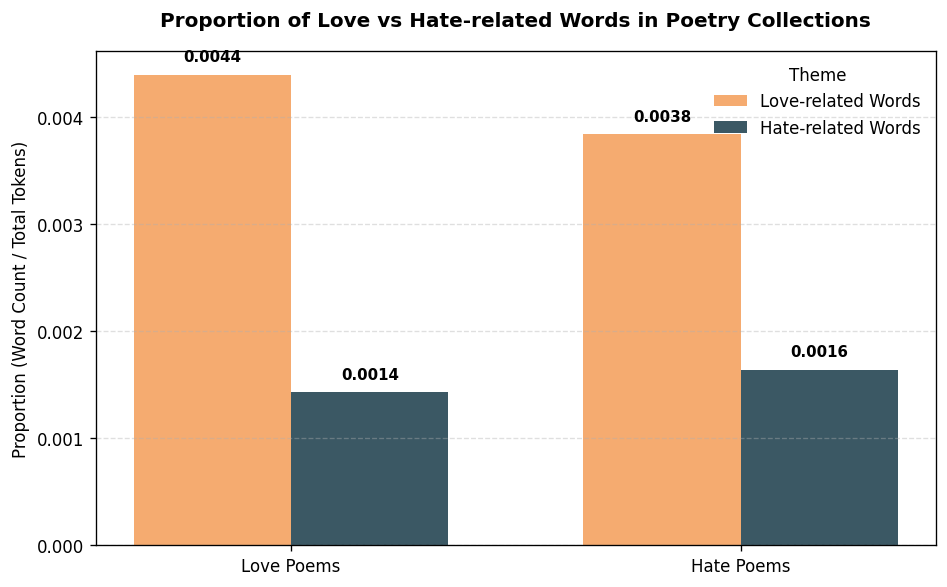


 Task 3 completed: Proportion histogram saved as 'plots/task3_love_hate_proportion.png'


In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

if os.path.exists("love_books.csv") and os.path.exists("hate_books.csv"):
    love_df = pd.read_csv("love_books.csv")
    hate_df = pd.read_csv("hate_books.csv")
    print("✅ Loaded data from Task 1 CSV files.")
else:
    raise FileNotFoundError(" Task 1 CSVs missing. Run Task 1 first.")

# ---  Setup NLTK --------------------------------------------------------
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)
nltk.download("punkt", quiet=True)

# ---  Define manual seed words ------------------------------------------
love_seeds = ["love", "affection", "romance", "passion", "desire",
              "tenderness", "kindness", "devotion", "friendship", "care"]
hate_seeds = ["hate", "anger", "rage", "violence", "hostility",
              "disgust", "revenge", "fear", "cruelty", "bitterness"]

# ---  Expand using WordNet ---------------------------------------------
def expand_synonyms(seed_words, max_synsets=5):
    expanded = set(seed_words)
    for word in seed_words:
        for syn in wn.synsets(word)[:max_synsets]:
            for lemma in syn.lemmas():
                w = lemma.name().lower().replace("_", " ")
                if w.isalpha():
                    expanded.add(w)
    return expanded

love_words = expand_synonyms(love_seeds)
hate_words = expand_synonyms(hate_seeds)

print(f" WordNet love words: {len(love_words)}")
print(f"WordNet hate words: {len(hate_words)}")

# ---  Integrate NRC Emotion Lexicon (EmoLex) ----------------------------
#  Download from: https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm
# Extract 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt' into your working folder
emolex_path = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

if os.path.exists(emolex_path):
    emolex_df = pd.read_csv(emolex_path, sep="\t", names=["word", "emotion", "association"])
    # Select emotion categories
    love_emotions = ["joy", "trust"]
    hate_emotions = ["anger", "disgust", "fear"]

    emolex_love_words = set(
        emolex_df[(emolex_df["emotion"].isin(love_emotions)) &
                  (emolex_df["association"] == 1)]["word"]
    )
    emolex_hate_words = set(
        emolex_df[(emolex_df["emotion"].isin(hate_emotions)) &
                  (emolex_df["association"] == 1)]["word"]
    )

    # Merge WordNet + EmoLex
    love_words = love_words.union(emolex_love_words)
    hate_words = hate_words.union(emolex_hate_words)
    print(f" Combined Love words: {len(love_words)}, Hate words: {len(hate_words)}")
else:
    print(" EmoLex file not found. Using only WordNet + manual seeds.")

# ---  Compute normalized proportions ------------------------------------
def calculate_theme_proportion(df, theme_words):
    total_tokens = 0
    theme_word_count = 0
    for text in df["text"]:
        if isinstance(text, str):
            tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
            total_tokens += len(tokens)
            theme_word_count += sum(1 for w in tokens if w in theme_words)
    proportion = theme_word_count / total_tokens if total_tokens > 0 else 0
    return round(proportion, 5)

love_in_love = calculate_theme_proportion(love_df, love_words)
hate_in_love = calculate_theme_proportion(love_df, hate_words)
love_in_hate = calculate_theme_proportion(hate_df, love_words)
hate_in_hate = calculate_theme_proportion(hate_df, hate_words)

# ---  Summary table -----------------------------------------------------
result_df = pd.DataFrame({
    "Dataset": ["Love Poems", "Hate Poems"],
    "Love_Word_Proportion": [love_in_love, love_in_hate],
    "Hate_Word_Proportion": [hate_in_love, hate_in_hate]
})
print("\n Emotion Word Proportion Summary:")
print(result_df.to_string(index=False))

x = np.arange(len(result_df))
bar_width = 0.35

plt.figure(figsize=(8, 5), dpi=120)
plt.bar(x - bar_width/2, result_df["Love_Word_Proportion"],
        width=bar_width, label="Love-related Words", color="#f4a261", alpha=0.9)
plt.bar(x + bar_width/2, result_df["Hate_Word_Proportion"],
        width=bar_width, label="Hate-related Words", color="#264653", alpha=0.9)

for i, val in enumerate(result_df["Love_Word_Proportion"]):
    plt.text(i - bar_width/2, val + 0.0001, f"{val:.4f}",
             ha="center", va="bottom", fontsize=9, fontweight="bold")
for i, val in enumerate(result_df["Hate_Word_Proportion"]):
    plt.text(i + bar_width/2, val + 0.0001, f"{val:.4f}",
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.xticks(x, result_df["Dataset"])
plt.ylabel("Proportion (Word Count / Total Tokens)", fontsize=10)
plt.title("Proportion of Love vs Hate-related Words in Poetry Collections",
          fontsize=12, fontweight="bold", pad=15)
plt.legend(title="Theme", frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

# ---  Save & display ---------------------------------------------------
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task3_love_hate_proportion.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n Task 3 completed: Proportion histogram saved as 'plots/task3_love_hate_proportion.png'")


4. Next, we want to explore how the context of these words were employed in each dataframe. For this purpose, suggest a script that scans for each occurrence of hate or love related words appearance to retrieve the words that appear within 2-token distance on the left and right hand side of the target word. Finally identify the frequency of these words in each dataframe. Present the results as wordcloud illustration showing the context of hate occurrence and another one for Love occurrence in each dataframe. Comment on the interpretation of these results.

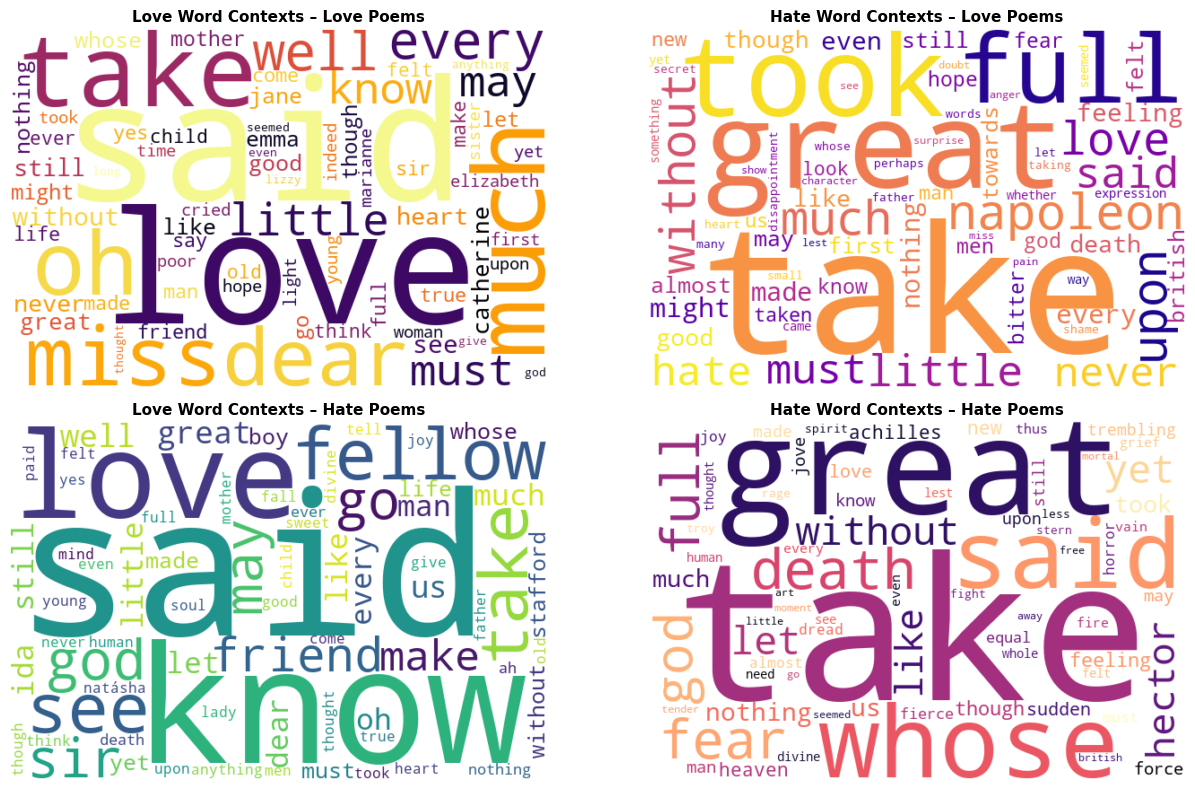


✅ Task 4 completed: Filtered and enhanced word clouds saved in 'plots/task4_combined_wordclouds.png'


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# --- Ensure required resources ---
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

stop_words = set(stopwords.words("english"))
custom_stop = {"thy", "thou", "thee", "ye", "shall", "unto", "would", "could", "also", "one"}
stop_words.update(custom_stop)

# --- Helper: collect context words with stopword filtering ---
def get_context_words(df, target_words, window=2):
    counter = Counter()
    for text in df["text"]:
        if not isinstance(text, str):
            continue
        tokens = [t.lower() for t in word_tokenize(text) if t.isalpha()]
        for i, tok in enumerate(tokens):
            if tok in target_words:
                start, end = max(0, i - window), min(len(tokens), i + window + 1)
                context_window = [
                    w for w in tokens[start:i] + tokens[i + 1:end] if w not in stop_words
                ]
                counter.update(context_window)
    return counter

# --- Compute filtered contexts ---
love_context_love_df = get_context_words(love_df, love_words)
hate_context_love_df = get_context_words(love_df, hate_words)
love_context_hate_df = get_context_words(hate_df, love_words)
hate_context_hate_df = get_context_words(hate_df, hate_words)

# --- Helper: make professional wordclouds ---
def make_wordcloud(counter, title, filename, cmap="inferno"):
    if not counter:
        print(f"⚠️ No words found for {title}")
        return
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=cmap,
        max_words=80,
        contour_color="black",
        contour_width=1.2
    ).generate_from_frequencies(counter)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=13, fontweight="bold", pad=10)

os.makedirs("plots", exist_ok=True)

# --- Generate a combined 2×2 subplot figure for report ---
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.2, wspace=0.05)

contexts = [
    (love_context_love_df, "Love Word Contexts – Love Poems", "inferno"),
    (hate_context_love_df, "Hate Word Contexts – Love Poems", "plasma"),
    (love_context_hate_df, "Love Word Contexts – Hate Poems", "viridis"),
    (hate_context_hate_df, "Hate Word Contexts – Hate Poems", "magma")
]

for ax, (counter, title, cmap) in zip(axs.flat, contexts):
    if counter:
        wc = WordCloud(
            width=600, height=400, background_color="white",
            colormap=cmap, max_words=70
        ).generate_from_frequencies(counter)
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontsize=11, fontweight="bold", pad=5)

plt.tight_layout()
plt.savefig("plots/task4_combined_wordclouds.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nTask 4 completed: Filtered and enhanced word clouds saved in 'plots/task4_combined_wordclouds.png'")


5. Next, we want to comprehend the sequential occurrence of Love related words and Hate related words in each dataframe. For this purpose, suggest a script that calculates the distance (in terms of number of tokens) between one hate-related word to the immediate next one in the dataframe, and another one for computing the distance between love-related word and the next one. Use appropriate discretization (taking into account the difference between the maximum and minimum distance) to construct a 10-bin histogram showing the frequency of each distance range for both Hate and Love related terms.

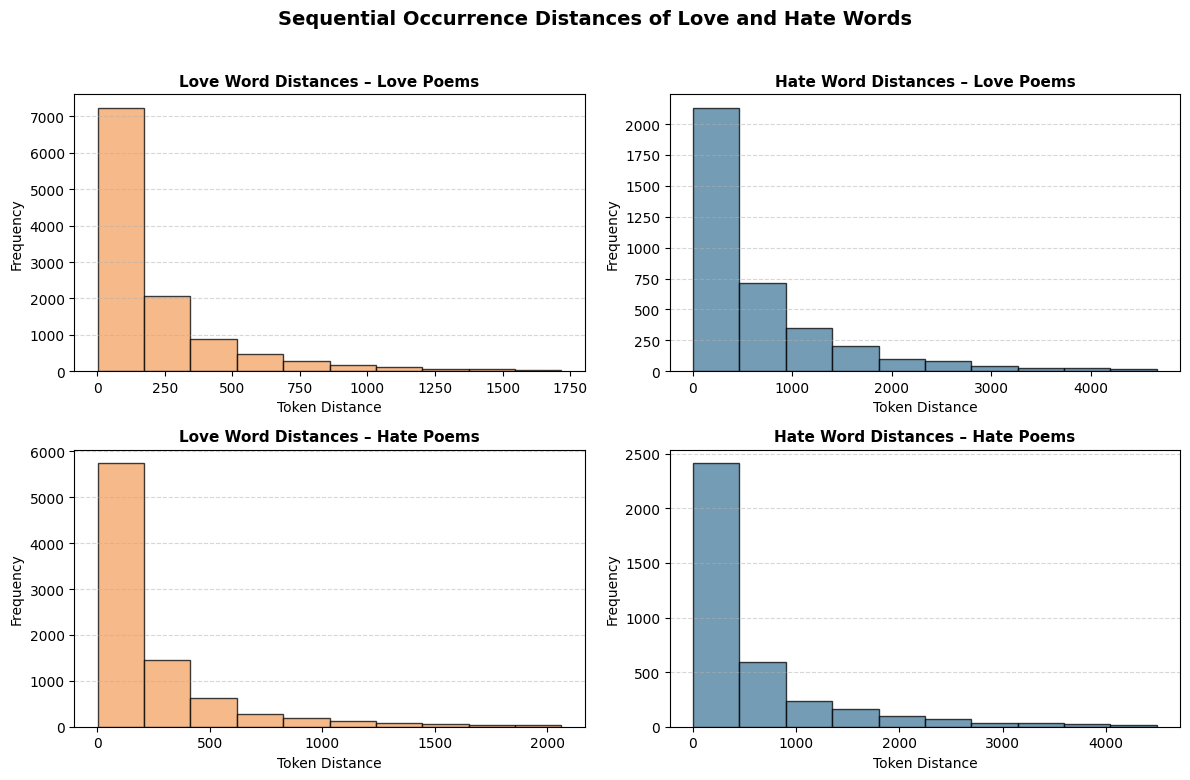


 Distance Summary Statistics:
Love→Love (Love Poems): mean=227.10, median=105.00, max=6553
Hate→Hate (Love Poems): mean=700.96, median=358.00, max=13434
Love→Love (Hate Poems): mean=260.37, median=110.00, max=9393
Hate→Hate (Hate Poems): mean=607.88, median=237.00, max=13913

 Task 5 completed: Explicit NumPy histogram used and figure saved to 'plots/task5_distance_histograms.png'


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import os

# ---  Compute token distances between consecutive words ---
def compute_word_distances(df, theme_words):
    """Compute token distances between consecutive occurrences of theme words."""
    all_tokens = []
    for text in df["text"]:
        if not isinstance(text, str):
            continue
        tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
        all_tokens.extend(tokens)

    # indices where theme words occur
    indices = [i for i, t in enumerate(all_tokens) if t in theme_words]
    if len(indices) < 2:
        return []

    # consecutive distances
    distances = np.diff(indices)
    return distances.tolist()

# ---  Compute distances for all datasets ---
love_dists_in_love_df = compute_word_distances(love_df, love_words)
hate_dists_in_love_df = compute_word_distances(love_df, hate_words)
love_dists_in_hate_df = compute_word_distances(hate_df, love_words)
hate_dists_in_hate_df = compute_word_distances(hate_df, hate_words)

# ---  Explicit histogram plotting using numpy.histogram ---
def plot_distance_histogram(distances, title, color, ax):
    if not distances:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(title, fontsize=11, fontweight="bold")
        return

    distances = np.array(distances)
    
    max_cap = np.percentile(distances, 99)
    distances = distances[distances <= max_cap]

    bins = np.linspace(distances.min(), distances.max(), 11)  # 10 bins
    counts, bin_edges = np.histogram(distances, bins=bins)

    # --- Plot histogram manually using bar chart ---
    ax.bar(bin_edges[:-1], counts, width=np.diff(bin_edges),
           color=color, alpha=0.75, edgecolor="black", align="edge")
    ax.set_title(title, fontsize=11, fontweight="bold")
    ax.set_xlabel("Token Distance")
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

plot_distance_histogram(love_dists_in_love_df,
    "Love Word Distances – Love Poems", "#f4a261", axs[0,0])
plot_distance_histogram(hate_dists_in_love_df,
    "Hate Word Distances – Love Poems", "#457b9d", axs[0,1])
plot_distance_histogram(love_dists_in_hate_df,
    "Love Word Distances – Hate Poems", "#f4a261", axs[1,0])
plot_distance_histogram(hate_dists_in_hate_df,
    "Hate Word Distances – Hate Poems", "#457b9d", axs[1,1])

plt.suptitle("Sequential Occurrence Distances of Love and Hate Words",
             fontsize=14, fontweight="bold", y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# ---  Save and show figure ---
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task5_distance_histograms.png", dpi=300, bbox_inches="tight")
plt.show()

# ---  Print summary statistics ---
def print_stats(label, distances):
    if len(distances) > 1:
        print(f"{label}: mean={np.mean(distances):.2f}, median={np.median(distances):.2f}, max={np.max(distances)}")
    else:
        print(f"{label}: Not enough data")

print("\n Distance Summary Statistics:")
print_stats("Love→Love (Love Poems)", love_dists_in_love_df)
print_stats("Hate→Hate (Love Poems)", hate_dists_in_love_df)
print_stats("Love→Love (Hate Poems)", love_dists_in_hate_df)
print_stats("Hate→Hate (Hate Poems)", hate_dists_in_hate_df)

print("\n Task 5 completed: Explicit NumPy histogram used and figure saved to 'plots/task5_distance_histograms.png'")


6. Repeat the specification 5), when we consider the distance between a hate-related word and the next love-related term. Comment on the result regarding the possible asymmetry of the results, and how this can be linked to the context words identified in specification 4.

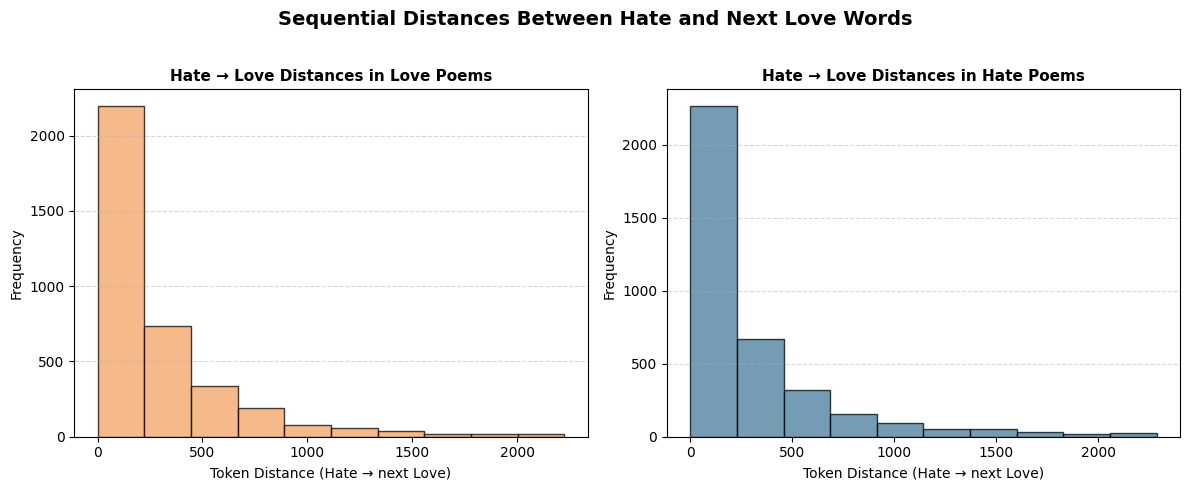


 Hate → Love Distance Summary:
Love Poems: mean=314.72, median=162.50, max=6553
Hate Poems: mean=334.86, median=158.00, max=9393

 Task 6 completed: comparison plot saved to 'plots/task6_hate_to_love_distances.png'


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import os

# --- Step 1: Compute distance from each Hate → next Love word ---
def compute_cross_distances(df, hate_words, love_words):
    """Return distances (in tokens) between hate word and next love word."""
    tokens = [w.lower() for text in df["text"] if isinstance(text, str)
              for w in word_tokenize(text) if w.isalpha()]

    hate_idx = [i for i, w in enumerate(tokens) if w in hate_words]
    love_idx = [i for i, w in enumerate(tokens) if w in love_words]

    if not hate_idx or not love_idx:
        return []

    distances = []
    for h in hate_idx:
        # find first love index after this hate index
        next_loves = [l for l in love_idx if l > h]
        if next_loves:
            distances.append(next_loves[0] - h)
    return distances

# --- Step 2: Compute Hate→Love distances for both corpora ---
cross_dists_love_df = compute_cross_distances(love_df, hate_words, love_words)
cross_dists_hate_df = compute_cross_distances(hate_df, hate_words, love_words)

# --- Step 3: Function to plot explicit NumPy histogram ---
def plot_cross_hist(distances, title, color, ax):
    if not distances:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(title, fontsize=11, fontweight="bold")
        return

    distances = np.array(distances)
    # Remove outliers (99th percentile cap)
    max_cap = np.percentile(distances, 99)
    distances = distances[distances <= max_cap]

    # Explicit histogram binning (10 bins)
    bins = np.linspace(distances.min(), distances.max(), 11)
    counts, bin_edges = np.histogram(distances, bins=bins)

    # Manual plot
    ax.bar(bin_edges[:-1], counts, width=np.diff(bin_edges),
           color=color, alpha=0.75, edgecolor="black", align="edge")
    ax.set_title(title, fontsize=11, fontweight="bold")
    ax.set_xlabel("Token Distance (Hate → next Love)")
    ax.set_ylabel("Frequency")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

# --- Step 4: Plot both histograms side-by-side ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_cross_hist(cross_dists_love_df, "Hate → Love Distances in Love Poems", "#f4a261", axs[0])
plot_cross_hist(cross_dists_hate_df, "Hate → Love Distances in Hate Poems", "#457b9d", axs[1])

plt.suptitle("Sequential Distances Between Hate and Next Love Words", fontsize=14, fontweight="bold", y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save output
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task6_hate_to_love_distances.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Step 5: Print summary statistics for interpretation ---
def print_stats(label, distances):
    if len(distances) > 1:
        print(f"{label}: mean={np.mean(distances):.2f}, median={np.median(distances):.2f}, max={np.max(distances)}")
    else:
        print(f"{label}: Not enough data")

print("\n Hate → Love Distance Summary:")
print_stats("Love Poems", cross_dists_love_df)
print_stats("Hate Poems", cross_dists_hate_df)

print("\n Task 6 completed: comparison plot saved to 'plots/task6_hate_to_love_distances.png'")


7. Use appropriate script to identify the 100-most frequent tokens of each dataframe outside the stopword list. We want to evaluate the extent to which hate and love related terms are related the most frequent terms. Suggest an approach to evaluate this proximity using both string matching and semantic similarity.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 words in Love Poems: ['would', 'said', 'one', 'could', 'must', 'like', 'time', 'well', 'man', 'little']
Top 10 words in Hate Poems: ['said', 'one', 'man', 'would', 'see', 'could', 'time', 'like', 'men', 'old']

🧾 Summary of Love/Hate Proximity:
      Dataset  StringOverlap_Count  SemanticSimilarity_Avg
0  Love Poems                    2                  0.1010
1  Hate Poems                    0                  0.0877


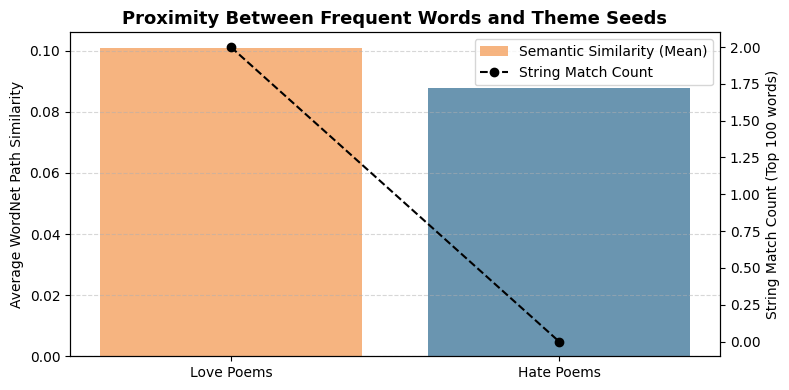


 Task 7 completed: Top tokens analyzed, proximity metrics calculated, and visualization saved to 'plots/task7_token_proximity.png'


In [15]:
import nltk
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---  Ensure NLTK resources ---
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")

# ---  Get top-N frequent words excluding stopwords ---
def get_top_tokens(df, n=100):
    stop_words = set(stopwords.words("english"))
    tokens = [
        w.lower()
        for text in df["text"]
        if isinstance(text, str)
        for w in word_tokenize(text)
        if w.isalpha()
    ]
    filtered = [w for w in tokens if w not in stop_words]
    freq = Counter(filtered)
    return dict(freq.most_common(n))

top_love_df = get_top_tokens(love_df)
top_hate_df = get_top_tokens(hate_df)

print("Top 10 words in Love Poems:", list(top_love_df.keys())[:10])
print("Top 10 words in Hate Poems:", list(top_hate_df.keys())[:10])

# --- String-matching overlap ---
def string_match_overlap(top_words, theme_words):
    return [w for w in top_words if w in theme_words]

love_overlap_love_df = string_match_overlap(top_love_df.keys(), love_words)
hate_overlap_hate_df = string_match_overlap(top_hate_df.keys(), hate_words)

# ---  Semantic similarity via WordNet ---
def avg_semantic_similarity(word_list, theme_seeds):
    sims = []
    for w in word_list:
        w_syns = wn.synsets(w)
        if not w_syns:
            continue
        for seed in theme_seeds:
            s_syns = wn.synsets(seed)
            if not s_syns:
                continue
            # Compare only first sense for simplicity (WordNet hierarchy)
            sim = w_syns[0].path_similarity(s_syns[0])
            if sim is not None:
                sims.append(sim)
    return round(np.mean(sims), 4) if sims else 0.0

# ---  Compute similarities ---
love_sem_love_df = avg_semantic_similarity(top_love_df.keys(), love_seeds)
hate_sem_hate_df = avg_semantic_similarity(top_hate_df.keys(), hate_seeds)

# ---  Summary DataFrame ---
summary_df = pd.DataFrame({
    "Dataset": ["Love Poems", "Hate Poems"],
    "StringOverlap_Count": [len(love_overlap_love_df), len(hate_overlap_hate_df)],
    "SemanticSimilarity_Avg": [love_sem_love_df, hate_sem_hate_df]
})

print("\n🧾 Summary of Love/Hate Proximity:")
print(summary_df)

# ---  Visualization of both metrics ---
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar for semantic similarity
ax1.bar(summary_df["Dataset"], summary_df["SemanticSimilarity_Avg"],
        color=["#f4a261", "#457b9d"], alpha=0.8, label="Semantic Similarity (Mean)")

# Secondary axis for string overlap count
ax2 = ax1.twinx()
ax2.plot(summary_df["Dataset"], summary_df["StringOverlap_Count"],
         color="black", marker="o", linestyle="--", label="String Match Count")

# Titles and labels
ax1.set_title("Proximity Between Frequent Words and Theme Seeds", fontsize=13, fontweight="bold")
ax1.set_ylabel("Average WordNet Path Similarity")
ax2.set_ylabel("String Match Count (Top 100 words)")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task7_token_proximity.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n Task 7 completed: Top tokens analyzed, proximity metrics calculated, and visualization saved to 'plots/task7_token_proximity.png'")


8) Repeat the specification 7) when working for each poem in dataframe Love and each poem of dataframe hate.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



🧾 Per-Poem Semantic & Lexical Summary (first 10 rows):
                        Poem_Title Theme  StringOverlap_Love  \
0                       Love Songs  Love                   2   
1                 The Book of Love  Love                   0   
2                       Love Poems  Love                   0   
3      Sonnets from the Portuguese  Love                   3   
4  The Love Sonnets of Shakespeare  Love                   3   
5    The Love Sonnets of a Hoodlum  Love                   2   
6         Songs of Love and Beauty  Love                   0   
7            Love Poems and Others  Love                   1   
8         Songs of Love and Empire  Love                   0   
9            A Little Book of Love  Love                   3   

   StringOverlap_Hate  SemanticSim_Love  SemanticSim_Hate  
0                   0            0.0973            0.0869  
1                   0            0.0924            0.0839  
2                   0            0.0942            0.0854  

<Figure size 800x500 with 0 Axes>

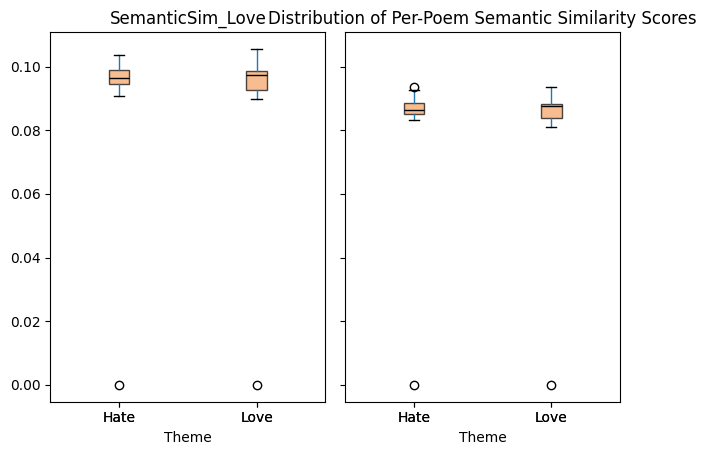

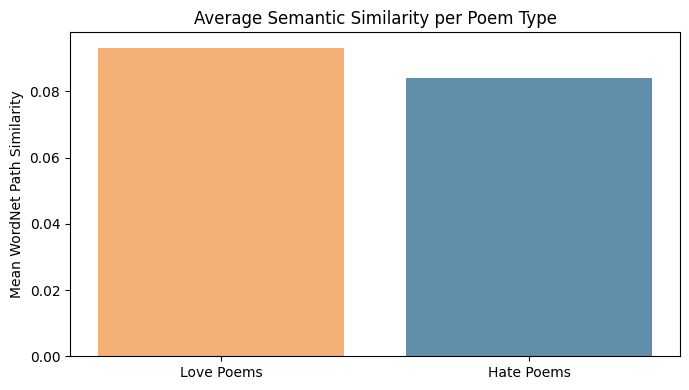


 Task 8 completed: Per-poem semantic and lexical proximity analysis done.


In [16]:
import nltk
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Ensure resources ---
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")


def get_top_tokens_per_text(text, n=100):
    stop_words = set(stopwords.words("english"))
    if not isinstance(text, str):
        return []
    tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
    filtered = [w for w in tokens if w not in stop_words]
    freq = Counter(filtered)
    return [w for w, _ in freq.most_common(n)]


def string_overlap(top_words, theme_words):
    return len([w for w in top_words if w in theme_words])


def avg_semantic_similarity(word_list, theme_seeds):
    sims = []
    for w in word_list:
        w_syns = wn.synsets(w)
        if not w_syns:
            continue
        for seed in theme_seeds:
            s_syns = wn.synsets(seed)
            if not s_syns:
                continue
            sim = w_syns[0].path_similarity(s_syns[0])
            if sim is not None:
                sims.append(sim)
    return round(np.mean(sims), 4) if sims else 0.0


results = []

for theme_df, theme_label in [(love_df, "Love"), (hate_df, "Hate")]:
    for _, row in theme_df.iterrows():
        top_words = get_top_tokens_per_text(row.get("text", ""))
        string_overlap_love = string_overlap(top_words, love_words)
        string_overlap_hate = string_overlap(top_words, hate_words)
        sem_love = avg_semantic_similarity(top_words, love_seeds)
        sem_hate = avg_semantic_similarity(top_words, hate_seeds)
        results.append({
            "Poem_Title": row.get("title", "Untitled"),
            "Theme": theme_label,
            "StringOverlap_Love": string_overlap_love,
            "StringOverlap_Hate": string_overlap_hate,
            "SemanticSim_Love": sem_love,
            "SemanticSim_Hate": sem_hate
        })


poem_summary_df = pd.DataFrame(results)
print("\n🧾 Per-Poem Semantic & Lexical Summary (first 10 rows):")
print(poem_summary_df.head(10))


os.makedirs("results", exist_ok=True)
poem_summary_df.to_csv("results/task8_per_poem_similarity.csv", index=False)
print("\n Results saved to 'results/task8_per_poem_similarity.csv'")


mean_love = poem_summary_df.loc[poem_summary_df["Theme"]=="Love", "SemanticSim_Love"].mean()
mean_hate = poem_summary_df.loc[poem_summary_df["Theme"]=="Hate", "SemanticSim_Hate"].mean()

print(f"\nMean Semantic Similarity (Love Poems): {mean_love:.4f}")
print(f"Mean Semantic Similarity (Hate Poems): {mean_hate:.4f}")


plt.figure(figsize=(8,5))
poem_summary_df.boxplot(column=["SemanticSim_Love", "SemanticSim_Hate"], by="Theme", grid=False,
                        patch_artist=True, boxprops=dict(facecolor="#f4a261", alpha=0.7),
                        medianprops=dict(color="black"))
plt.suptitle("")  
plt.title("Distribution of Per-Poem Semantic Similarity Scores")
plt.ylabel("WordNet Path Similarity")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.bar(["Love Poems","Hate Poems"], [mean_love, mean_hate],
        color=["#f4a261","#457b9d"], alpha=0.85)
plt.title("Average Semantic Similarity per Poem Type")
plt.ylabel("Mean WordNet Path Similarity")
plt.tight_layout()
plt.show()

print("\n Task 8 completed: Per-poem semantic and lexical proximity analysis done.")


9. We want to test the diversity of each dataframe. For this purpose, we consider the titles of the poems in each dataframe. Suggest a script that uses FastText embedding to calculate the similarity between any pairs of titles in each dataframe using cosine similarity and assuming the embedding of the title is the average of the embedding of its constituted words. Calculate the average semantic similarity measures of all pairs and their associated standard deviation, maximum and minimum value.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMISTAJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Loading FastText embeddings (fasttext-wiki-news-subwords-300)...
 FastText model loaded successfully!
 Computing title embeddings for 25 Love poems...
✅ Love Title Similarity Stats: {'Theme': 'Love', 'Num_Titles': 25, 'Avg_Similarity': np.float32(0.5916), 'Std_Deviation': np.float32(0.2099), 'Max_Similarity': np.float32(0.9686), 'Min_Similarity': np.float32(0.1704)}
 Computing title embeddings for 25 Hate poems...
✅ Hate Title Similarity Stats: {'Theme': 'Hate', 'Num_Titles': 25, 'Avg_Similarity': np.float32(0.8746), 'Std_Deviation': np.float32(0.1011), 'Max_Similarity': np.float32(1.0), 'Min_Similarity': np.float32(0.4594)}

 Results saved to 'results/task9_title_similarity.csv'

 Semantic Diversity Based on Title Similarity:

  Theme  Num_Titles  Avg_Similarity  Std_Deviation  Max_Similarity  \
0  Love          25          0.5916         0.2099          0.9686   
1  Hate          25          0.8746         0.1011          1.0000   

   Min_Similarity  
0          0.1704  
1         

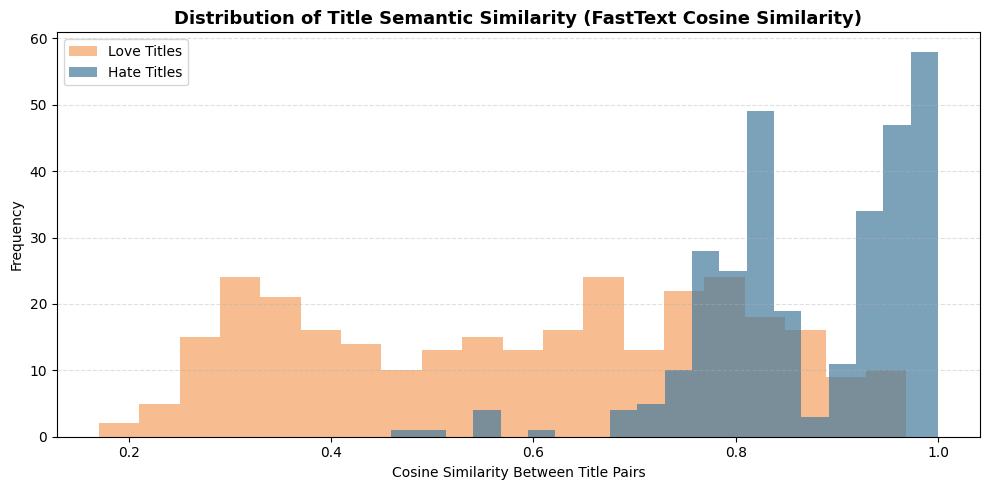


 Task 9 completed: Title diversity metrics and similarity distribution plotted successfully.


In [18]:
import gensim.downloader as api
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
import nltk

# --- Ensure tokenizer ---
nltk.download("punkt")

# ---  Load pretrained FastText model ---
print(" Loading FastText embeddings (fasttext-wiki-news-subwords-300)...")
ft_model = api.load("fasttext-wiki-news-subwords-300")
print(" FastText model loaded successfully!")

# ---  Function to compute average embedding for each poem title ---
def get_title_embedding(title, model):
    if not isinstance(title, str) or not title.strip():
        return np.zeros(model.vector_size)
    words = [w.lower() for w in word_tokenize(title) if w.isalpha()]
    valid_vectors = [model[w] for w in words if w in model.key_to_index]
    if not valid_vectors:
        return np.zeros(model.vector_size)
    return np.mean(valid_vectors, axis=0)

# ---  Compute pairwise cosine similarities within one dataframe ---
def compute_title_similarity_stats(df, model, theme_name):
    titles = df["title"].dropna().tolist()
    if len(titles) < 2:
        print(f" Not enough titles in {theme_name} dataset for similarity analysis.")
        return None
    
    print(f" Computing title embeddings for {len(titles)} {theme_name} poems...")
    embeddings = np.array([get_title_embedding(t, model) for t in titles])
    
    # Compute cosine similarity matrix
    sim_matrix = cosine_similarity(embeddings)
    
    # Extract unique upper triangle (excluding diagonal)
    upper_tri = sim_matrix[np.triu_indices(len(titles), k=1)]
    
    # Calculate summary statistics
    stats = {
        "Theme": theme_name,
        "Num_Titles": len(titles),
        "Avg_Similarity": round(np.mean(upper_tri), 4),
        "Std_Deviation": round(np.std(upper_tri), 4),
        "Max_Similarity": round(np.max(upper_tri), 4),
        "Min_Similarity": round(np.min(upper_tri), 4),
    }
    
    print(f"✅ {theme_name} Title Similarity Stats: {stats}")
    return upper_tri, stats

# ---  Run for Love and Hate titles ---
love_sims, love_stats = compute_title_similarity_stats(love_df, ft_model, "Love")
hate_sims, hate_stats = compute_title_similarity_stats(hate_df, ft_model, "Hate")

# --- Step 5: Combine and export results ---
results_df = pd.DataFrame([love_stats, hate_stats])
os.makedirs("results", exist_ok=True)
results_df.to_csv("results/task9_title_similarity.csv", index=False)
print("\n Results saved to 'results/task9_title_similarity.csv'")
print("\n Semantic Diversity Based on Title Similarity:\n")
print(results_df)

# ---  Visualization of similarity distributions ---
plt.figure(figsize=(10, 5))
plt.hist(love_sims, bins=20, color="#f4a261", alpha=0.7, label="Love Titles")
plt.hist(hate_sims, bins=20, color="#457b9d", alpha=0.7, label="Hate Titles")
plt.title("Distribution of Title Semantic Similarity (FastText Cosine Similarity)", fontsize=13, fontweight="bold")
plt.xlabel("Cosine Similarity Between Title Pairs")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/task9_title_similarity_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("\n Task 9 completed: Title diversity metrics and similarity distribution plotted successfully.")


10. We now consider the lexical diversity LD in the poem. This can be expressed using the adjective/adverb-to-verb ratio (number of adjectives and adverbs to the number of verbs) in each line of  the poem. For this, you may select one poem at random from the first dataframe and another one from  the second dataframe (You may also select the poem whose title brings the highest similarity with the  hate/love related terms for instance, or any other reasoning). Using part-of-speech tagging that identifies verb, adjective and adverb entities, suggest a program that calculates LD for each line of the code. Save the result in the database. Plot the graph of LD. Suggest a 10-equal subdivision of values of LD (take the highest value of LD and subtract the smallest value of LD and divide by 10 to find the bin value, and then take the smallest of LD and add bin, then 2*bin, etc.. to find the next interval (You will end up with 10 intervals). Now calculate and plot the corresponding histogram (calculating the number of lines of poem whose LD value fall within a specific interval). Find out whether a parametric fitting (polynomial, logarithmic or exponential) can be achieved. Perform this process for both poems in each dataframe

Selected Love Poem: The Love Letters of Abelard and Heloise
Selected Hate Poem: Poems of the Great War by Grenfell


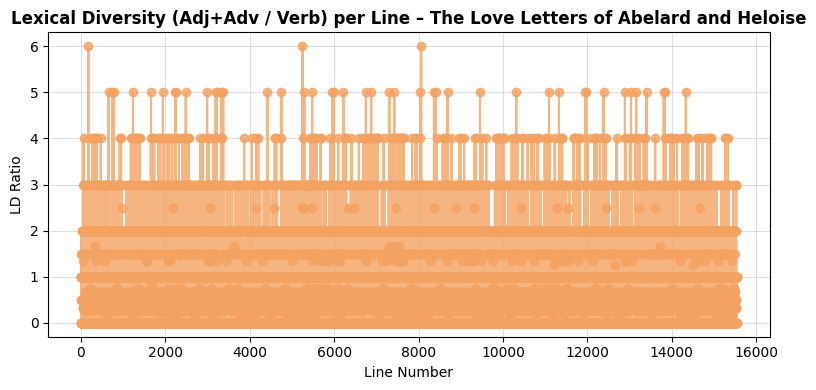

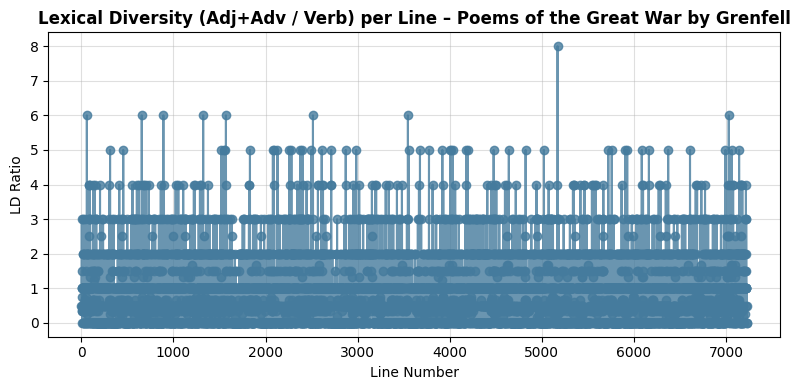

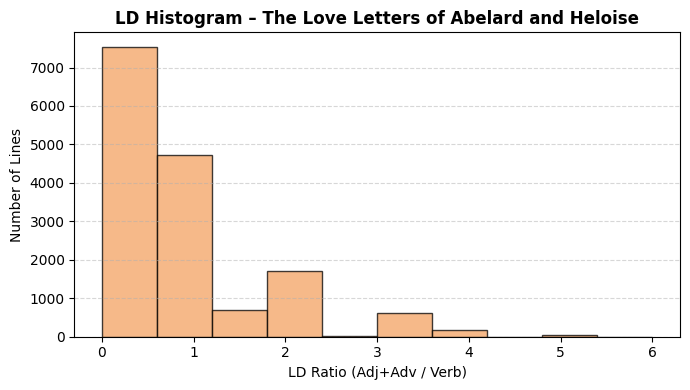

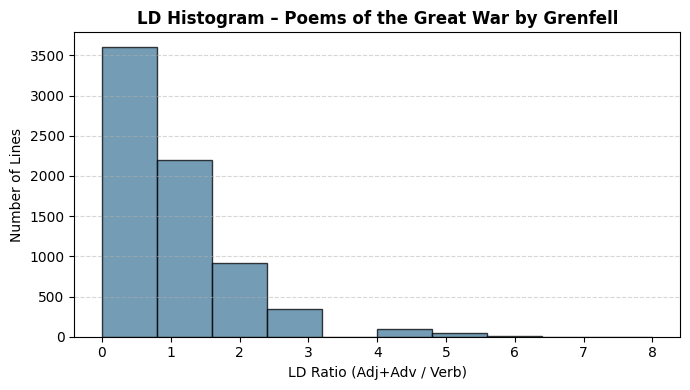


Fitting Love Poem:
Best fit: Polynomial (RMSE=0.8654)


C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_12056\42203170.py:94: RuntimeWarning: overflow encountered in exp
  def expo(x, a, b, c): return a*np.exp(b*x) + c
c:\Users\OMISTAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1024: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_12056\42203170.py:100: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x, y, maxfev=5000)
C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_12056\42203170.py:102: RuntimeWarning: overflow encountered in square
  rmse = np.sqrt(np.mean((y - y_fit)**2))
C:\Users\OMISTAJA\AppData\Local\Temp\ipykernel_12056\42203170.py:95: RuntimeWarning: invalid value encountered in log
  def loga(x, a, b, c): return a*np.log(b*x) + c


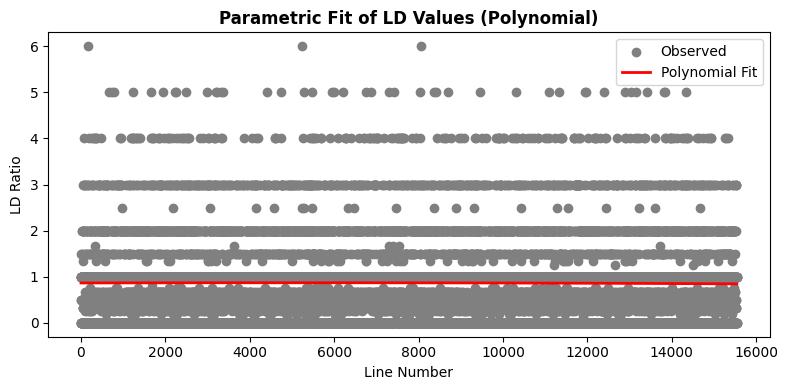


Fitting Hate Poem:
Best fit: Polynomial (RMSE=0.9502)


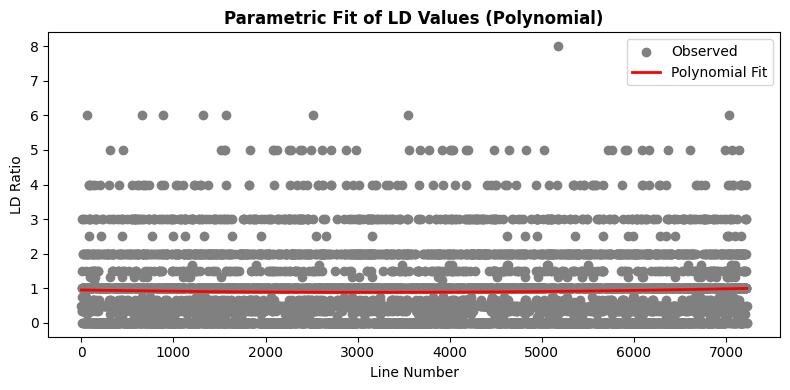

💾 LD results saved to 'results/task10_lexical_diversity.csv'


In [ ]:
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
from scipy.optimize import curve_fit
import os

# --- NLTK resources  ---
nltk.download("punkt", quiet=True)

nltk.download("averaged_perceptron_tagger", quiet=True)

try:
    nltk.data.find("taggers/averaged_perceptron_tagger_eng")
except LookupError:
    nltk.download("averaged_perceptron_tagger_eng", quiet=True)

# === Select poems ===
love_poem = love_df.iloc[10]
hate_poem = hate_df.iloc[12]
print(f"Selected Love Poem: {love_poem['title']}")
print(f"Selected Hate Poem: {hate_poem['title']}")

def compute_ld_per_line(poem_text):
    lines = [ln.strip() for ln in re.split(r"[\r\n]+", poem_text) if ln.strip()]
    ld_values = []
    for line in lines:
        tokens = word_tokenize(line)
        
        tagged = pos_tag(tokens, lang="eng")

        adjectives = [w for w, t in tagged if t.startswith("JJ")]
        adverbs   = [w for w, t in tagged if t.startswith("RB")]
        verbs     = [w for w, t in tagged if t.startswith("VB")]

        adj_adv = len(adjectives) + len(adverbs)
        verb_count = len(verbs)
        ld = adj_adv / verb_count if verb_count > 0 else np.nan
        ld_values.append(ld)
    return lines, np.array(ld_values, dtype=float)

# --- Compute LD for both poems ---
love_lines, love_ld = compute_ld_per_line(love_poem["text"])
hate_lines, hate_ld = compute_ld_per_line(hate_poem["text"])

def clean_ld(ld):
    ld = np.asarray(ld, dtype=float)
    ld = ld[~np.isnan(ld)]
    return ld if ld.size > 0 else np.array([0.0])

love_ld = clean_ld(love_ld)
hate_ld = clean_ld(hate_ld)

def plot_ld_curve(ld_values, title, color):
    plt.figure(figsize=(8,4))
    plt.plot(range(1, len(ld_values)+1), ld_values, marker="o", color=color, alpha=0.8)
    plt.title(f"Lexical Diversity (Adj+Adv / Verb) per Line – {title}", fontsize=12, fontweight="bold")
    plt.xlabel("Line Number")
    plt.ylabel("LD Ratio")
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_ld_curve(love_ld, love_poem["title"], "#f4a261")
plot_ld_curve(hate_ld, hate_poem["title"], "#457b9d")

def plot_ld_histogram(ld_values, title, color):
    ld_min, ld_max = float(np.min(ld_values)), float(np.max(ld_values))
    if ld_max == ld_min:
        bins = [ld_min + i*0.1 for i in range(11)] 
    else:
        bin_width = (ld_max - ld_min) / 10.0
        bins = [ld_min + i*bin_width for i in range(11)]

    plt.figure(figsize=(7,4))
    plt.hist(ld_values, bins=bins, color=color, edgecolor="black", alpha=0.75)
    plt.title(f"LD Histogram – {title}", fontsize=12, fontweight="bold")
    plt.xlabel("LD Ratio (Adj+Adv / Verb)")
    plt.ylabel("Number of Lines")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_ld_histogram(love_ld, love_poem["title"], "#f4a261")
plot_ld_histogram(hate_ld, hate_poem["title"], "#457b9d")

def try_curve_fits(ld_values):
    x = np.arange(1, len(ld_values)+1, dtype=float)
    y = ld_values.astype(float)

    def poly(x, a, b, c): return a*x**2 + b*x + c
    def expo(x, a, b, c): return a*np.exp(b*x) + c
    def loga(x, a, b, c): return a*np.log(b*x) + c

    fits = {}
    for name, func in {"Polynomial": poly, "Exponential": expo, "Logarithmic": loga}.items():
        try:
            popt, _ = curve_fit(func, x, y, maxfev=5000)
            y_fit = func(x, *popt)
            rmse = np.sqrt(np.mean((y - y_fit)**2))
            fits[name] = (rmse, y_fit)
        except Exception:
            pass

    if fits:
        best_name, (best_rmse, best_y) = min(fits.items(), key=lambda kv: kv[1][0])
        print(f"Best fit: {best_name} (RMSE={best_rmse:.4f})")
        plt.figure(figsize=(8,4))
        plt.scatter(x, y, label="Observed", color="gray")
        plt.plot(x, best_y, label=f"{best_name} Fit", color="red", linewidth=2)
        plt.title(f"Parametric Fit of LD Values ({best_name})", fontsize=12, fontweight="bold")
        plt.xlabel("Line Number")
        plt.ylabel("LD Ratio")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No parametric fit could be achieved.")

print("\nFitting Love Poem:")
try_curve_fits(love_ld)

print("\nFitting Hate Poem:")
try_curve_fits(hate_ld)

# --- Save results ---
os.makedirs("results", exist_ok=True)
ld_summary = pd.DataFrame({
    "Theme": ["Love"]*len(love_ld) + ["Hate"]*len(hate_ld),
    "Poem_Title": [love_poem["title"]]*len(love_ld) + [hate_poem["title"]]*len(hate_ld),
    "LD_Value": np.concatenate([love_ld, hate_ld])
})
ld_summary.to_csv("results/task10_lexical_diversity.csv", index=False)
print("💾 LD results saved to 'results/task10_lexical_diversity.csv'")

11. Discuss your results with respect to existing literature regarding poem structures and artistic trends of your choice taking into account the status and type of poetry of the ebooks you used for this analysis.
